In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [25]:
df = pd.read_csv('./data/global_unemployment_data.csv')

df

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Zimbabwe,Unemployment rate by sex and age,Female,25+,Adults,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528
1130,Zimbabwe,Unemployment rate by sex and age,Female,Under 15,Children,5.174,5.666,6.014,6.289,6.555,6.990,8.494,9.853,9.670,9.518,9.414
1131,Zimbabwe,Unemployment rate by sex and age,Male,15-24,Youth,6.007,7.131,8.119,9.029,9.927,11.048,13.191,14.261,13.966,13.675,13.485
1132,Zimbabwe,Unemployment rate by sex and age,Male,25+,Adults,3.677,4.325,4.843,5.287,5.722,6.362,6.996,7.234,6.858,6.757,6.703


Inicialmente, vamos checar o tipo de cada coluna do dataset, convertendo-as para que seja possível utilizar menos memória

In [26]:
df.dtypes

country_name       object
indicator_name     object
sex                object
age_group          object
age_categories     object
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
2024              float64
dtype: object

In [27]:
#Convertendo colunas do tipo object para category
for column in df.columns: 
    if df[column].dtypes == 'object': 
        df[column] = df[column].astype('category')

df.dtypes

country_name      category
indicator_name    category
sex               category
age_group         category
age_categories    category
2014               float64
2015               float64
2016               float64
2017               float64
2018               float64
2019               float64
2020               float64
2021               float64
2022               float64
2023               float64
2024               float64
dtype: object

Uma vez que os tipos dos dados foram ajustados, vamos verificar a presença de valores nulos 

In [28]:
df.isnull().sum()

country_name       0
indicator_name     0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               6
2023              12
2024              12
dtype: int64

In [35]:
df.bfill(axis='index', inplace=True)

df.isnull().sum()

country_name      0
indicator_name    0
sex               0
age_group         0
age_categories    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
2024              0
dtype: int64

Agora vamos conferir a distribuição dos dados

In [37]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,11.387800,11.272444,11.122963,10.863516,10.516499,10.311452,11.851285,11.422645,10.382729,10.052745,10.010014
std,11.119002,10.915942,10.742947,10.640980,10.527773,10.297952,11.231580,10.873412,10.254078,9.958798,9.949455
min,0.027000,0.034000,0.038000,0.035000,0.044000,0.036000,0.056000,0.064000,0.067000,0.063000,0.060000
25%,3.933500,3.993500,3.945250,3.747500,3.672750,3.538500,4.334500,4.153500,3.568500,3.484500,3.484500
50%,7.697500,7.547500,7.504500,7.140500,6.706000,6.627500,8.067500,7.542500,6.624500,6.505000,6.495000
75%,15.050750,14.766250,14.467500,14.142000,13.343000,13.285500,15.316250,14.881500,13.498250,13.089250,12.941000
max,74.485000,74.655000,74.720000,75.416000,76.395000,77.173000,83.990000,82.135000,78.776000,78.541000,78.644000


In [61]:
print("Quantidade de países:", len(df.country_name.unique()))

Quantidade de países: 189


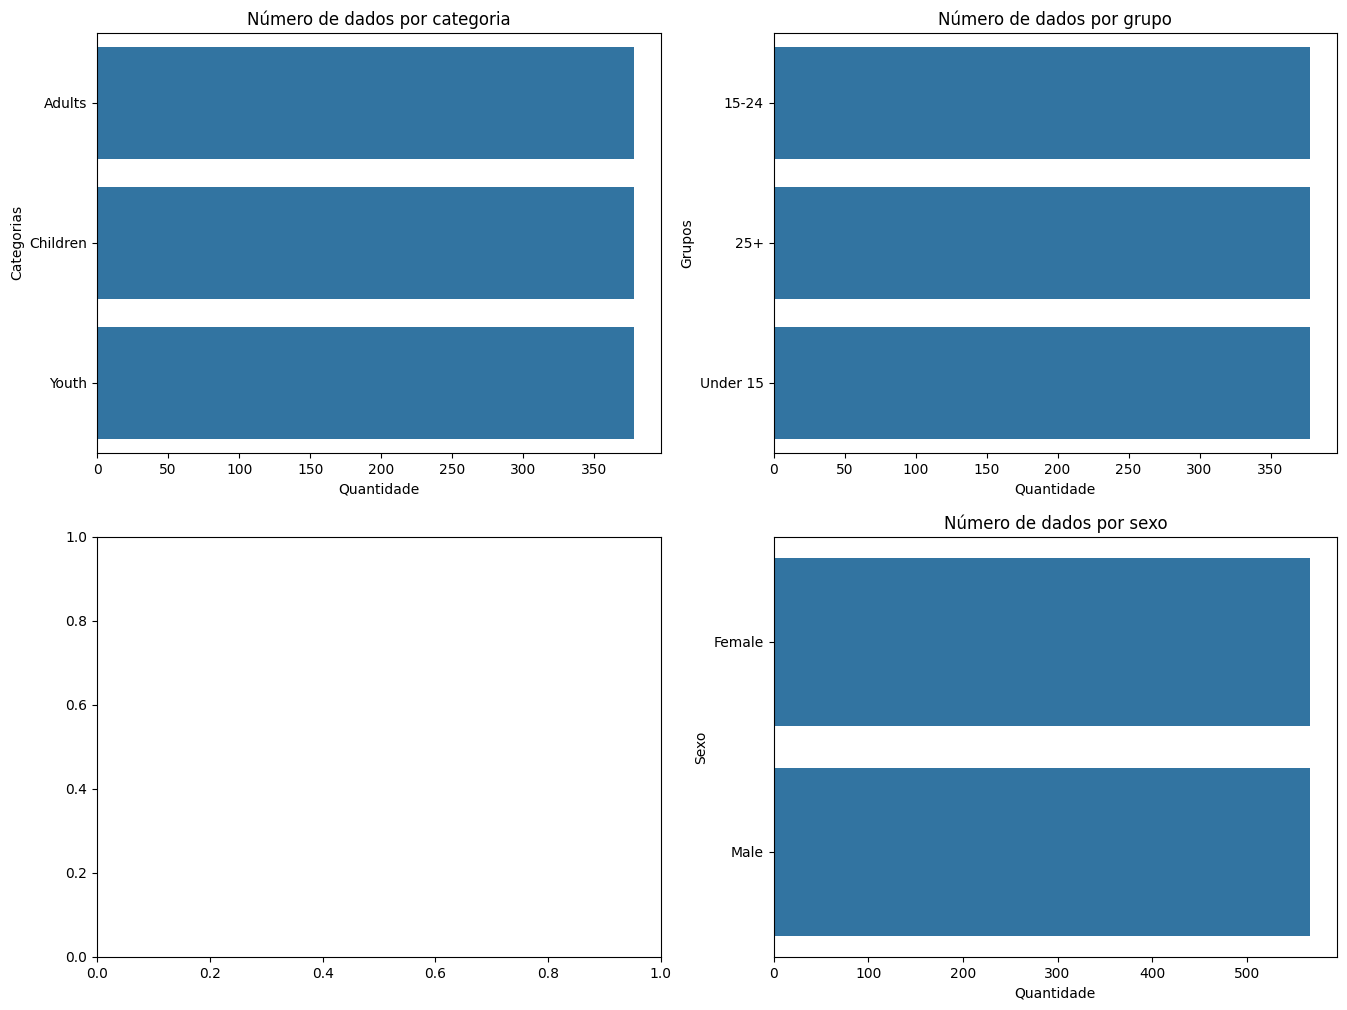

In [86]:
age_categories = df['age_categories'].value_counts()
age_group = df['age_group'].value_counts()
sex = df['sex'].value_counts()

fig, ax = plt.subplots(2, 2, figsize=(16,12))


sns.barplot(x=age_categories.values, y=age_categories.index, ax=ax[0, 0])

ax[0,0].set_title('Número de dados por categoria')
ax[0,0].set_xlabel('Quantidade')
ax[0,0].set_ylabel('Categorias')

sns.barplot(x=age_group.values, y=age_group.index, ax=ax[0,1])

ax[0,1].set_title('Número de dados por grupo')
ax[0,1].set_xlabel('Quantidade')
ax[0,1].set_ylabel('Grupos')

sns.barplot(x=sex.values, y=sex.index, ax=ax[1,1])

ax[1,1].set_title('Número de dados por sexo')
ax[1,1].set_xlabel('Quantidade')
ax[1,1].set_ylabel('Sexo')

plt.show()